In [1]:
#import the numpy and pandas library
import numpy as np
import pandas as pd

In [2]:
#import the data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style("darkgrid", {'xtick.bottom': True, 'ytick.left': True})
sns.set_context("paper", font_scale=1.4) #for increasing text size in plots   

In [4]:
#read the dataset
report = pd.read_csv("StudentsPerformance.csv")

#### Let's start exploring the data.

In [5]:
report.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
#removing spaces for ease
report.columns = report.columns.str.replace(" ","_")

In [8]:
report.isna().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### 1. Null Values:
- We can observe that the data does not contain any `null values` which is good.

In [9]:
#let's do some statistical analysis.
report.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


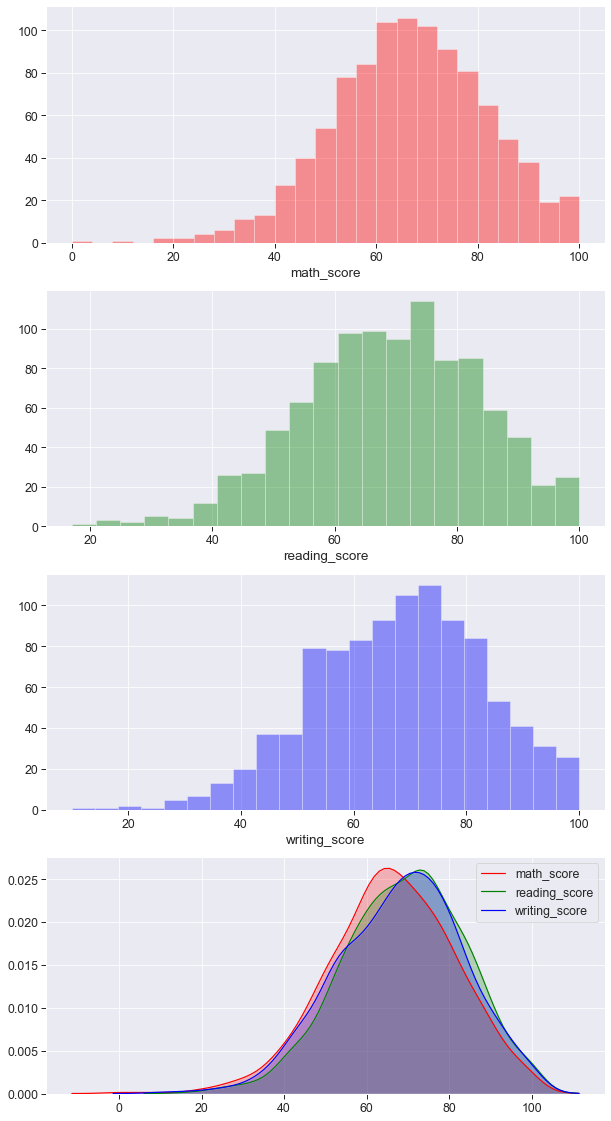

In [10]:
#Let's see the distribution of scores
fig, ax = plt.subplots(4,1, figsize=(10,20))#, gridspec_kw={'width_ratios': [3, 2]})
sns.distplot(report["math_score"], ax = ax[0], color = 'r', kde = False)
sns.kdeplot(report["math_score"], ax = ax[3], color = 'r', shade= True)
sns.distplot(report["reading_score"], ax = ax[1], color = 'g', kde = False)
sns.kdeplot(report["reading_score"], ax = ax[3], color = 'g', shade= True)
sns.distplot(report["writing_score"], ax = ax[2], color = 'b', kde = False)
sns.kdeplot(report["writing_score"], ax = ax[3], color = 'b', shade= True)

### 2. Scores Distribution:
- We can see that the `scores` have high frequency around 50 - 80 with `math scores` being slightly less than the other two.
- This can also be obeserved from the `statistical description` of the scores.
- The `mean` of the scores is between `66 - 69` and `standard deviation` is around `15` marks

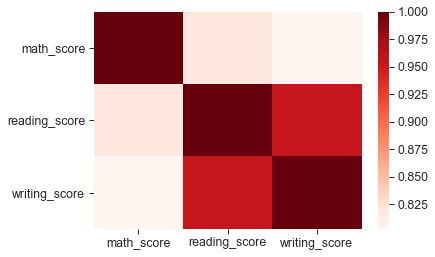

In [11]:
#creating a heatmap of correlation among various scores.
sns.heatmap(report.corr(), cmap="Reds")

### 3. Scores Correlation:
- From the `kdeplot`, we can see the similarity in the distribution of `scores`. The correlation `heatmap` confirms it as we can observe the `high correlation` of the `reading` and `writing` scores. The correlation of `math score` is also significantly high with other scores.

In [12]:
#let's create a column for percentage
report["percentage"] = round((report.math_score+report.reading_score+report.writing_score)/3,2)

In [13]:
def grade_it(score):          #grading criteria: 
    x = int(10 - score/10)  #100-91 - A, 90-81 - B, 80-71 - C, 70-61 - D, 60-51 - E, 50-41 - F, less than or equal to 40 - Fail
    if x >= 6:
        x = 6
    return ['A', 'B', 'C', 'D', 'E', 'F', 'Fail'][x]

In [14]:
#let's add a column of grades of students
report["grades"] = report.percentage.apply(grade_it)
report.head() #final dataframe

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,percentage,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,C
1,female,group C,some college,standard,completed,69,90,88,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,F
4,male,group C,some college,standard,none,76,78,75,76.33,C


#### Let's check the categorical columns.

In [15]:
def custom_alpha(x,alph): #function to add transparency to colors(change alpha value)
    x = list(x)
    x[-1] = alph
    return x

def my_plot(col,alph = 0.6, cmap="Set1", ptype = None, fsize = (10,5), order = True): # function for custom hist/countplot or donut pie chart
    
    fig, ax = plt.subplots(1, figsize=fsize)
    fig.patch.set_facecolor('#EAEAF2')
    
    theme = plt.get_cmap(cmap) #get required cmap
    colors = [theme(i) for i in np.linspace(0, 1, col.nunique())] #get colors from cmap
    
    if alph != 1: #if aplha not 1 then change value of alpha
        colors = list(map(custom_alpha,colors,[alph]*col.nunique()))
        
    col_sorted = col.value_counts().sort_index() #column.value_counts sorted according to index
    
    if ptype in ["count","hist"]: #if ptype is given count or hist
        if order: #if we want to sort the bars
            order=col.value_counts().index.sort_values()
        sns.countplot(col, order=order, palette=cmap) #plot a countplot
        ax.tick_params(labelrotation=90) #rotate xtick labels for better readability
        
    else: #plot a donut pie chart        
        arg = ax.pie(col_sorted,colors = colors, startangle=90, autopct='%1.1f%%',explode= [0.025]*col.nunique(),
                       pctdistance=0.7, wedgeprops={"width":0.6,"edgecolor":"0",'linewidth': 1}) #plot function
        
        #next part of the code is for labels in boxes
        wedges, text = arg[0:2]
        
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-", color='black', lw=1.5),
                  bbox=bbox_props, zorder=0, va="center")

        for i, p in enumerate(wedges):
            ang = (p.theta2 - p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate(col_sorted.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                       horizontalalignment=horizontalalignment, **kw)
        
    plt.suptitle("Distribution of "+col.name, size="x-large", weight="semibold")
    plt.show()

In [16]:
#function to plot the scores
def plot_score(df,col,hue=None, fsize = (16,6), pal = "muted", sort_order = True, ptype = None):
    
    fig, ax = plt.subplots(1,3, figsize=fsize)
    
    fig.suptitle('Scores according to '+col, weight="semibold") #adding a title to the plots
    
    score_cols = report.select_dtypes("number").columns #getting all the scores columns(dtype == "number")
    
    order = df[col].value_counts().index.sort_values() if sort_order else None #if order is provided
    
    sns.set_palette(pal) #setting a color pallete
    
    #next part is the plotting functions based on type
    for i in range(3):
        if ptype == "boxen":
            sns.boxenplot(x=col, y=score_cols[i],hue=hue,data = df, ax= ax[i], order=order) #seaborm boxenplot
        elif ptype == "swarm":
            sns.swarmplot(x=col, y=score_cols[i],hue=hue,data = df, ax= ax[i], order=order) #seaborm swarmplot
        elif ptype == "violin":
            sns.violinplot(x=col, y=score_cols[i],hue=hue,data = df, ax= ax[i], order=order) #seaborm violinplot
        else:
             sns.boxplot(x=col, y=score_cols[i],hue=hue,data = df, ax= ax[i], order=order) #seaborm boxplot
                
        ax[i].tick_params(labelrotation=90) #rotate the labels
        ax[i].set_title(score_cols[i], weight="medium") #add title to each plot

In [17]:
#function to plot countplot for grades
def cplot(df,hue, pal="tab10"):
    plt.figure(figsize=(12,6))
    order = report.grades.value_counts().index.sort_values()
    sns.countplot(x= "grades", hue=hue, data=df, order=order, palette=pal)

In [18]:
# To get some idea about object data types.
report.select_dtypes("object").describe()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,grades
count,1000,1000,1000,1000,1000,1000
unique,2,5,6,2,2,7
top,female,group C,some college,standard,none,D
freq,518,319,226,645,642,260


In [19]:
report.percentage.describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: percentage, dtype: float64

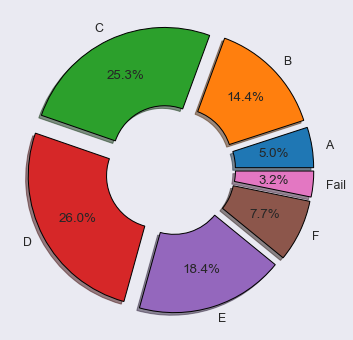

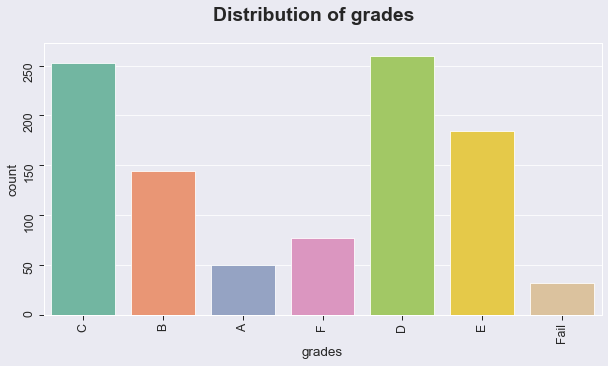

In [20]:
plt.figure(figsize=(6,6)).patch.set_facecolor('#EAEAF2')
grade_sorted = report["grades"].value_counts().sort_index()
plt.pie(grade_sorted, explode= [0.1]*report["grades"].nunique(),
        labels = grade_sorted.index, autopct='%1.1f%%', pctdistance=0.7,
           wedgeprops={"width":0.6,"edgecolor":"0",'linewidth': 1}, shadow=True)

my_plot(report["grades"], 0.6, cmap="Set2", ptype= "count", order=None)

### 4. Distribution of grades:
- From the statistical description of `percentage`, we can see that the `average marks` scored by students in all the three exams is around `68`.
- Highest no. of students have a `C grade` followed by `D grade`. This accounts for more than `50%` of students.

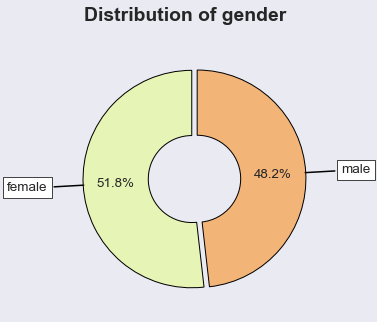

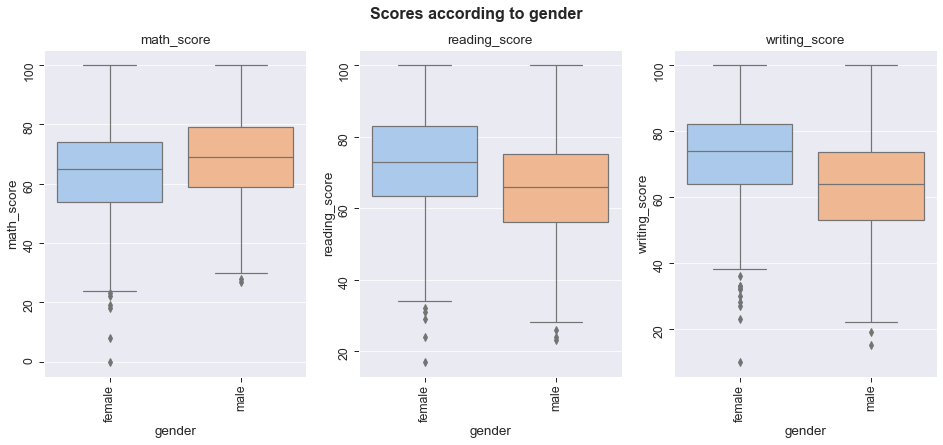

In [21]:
my_plot(report["gender"],0.5, "Wistia")
plot_score(report,"gender", pal= "pastel" )

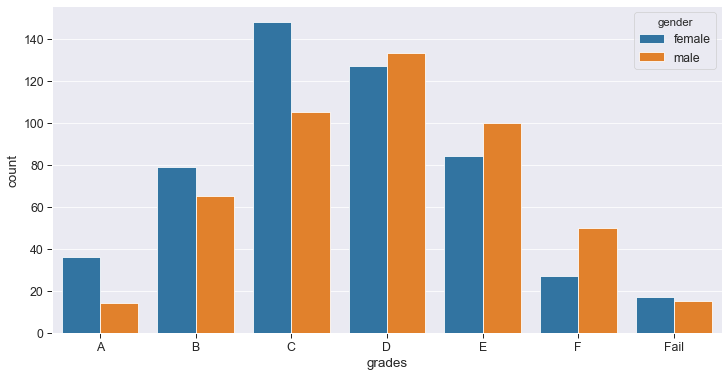

In [22]:
cplot(report,"gender")

### 5. Distribution of Scores and Grades based on Gender:
- The ratio of  `male` and `female` seem to be almost 1:1 with slightly more no of `females`.
- From the graphs above, we can observe that `male` students performed better in `math` as compared to `feamle`. Whereas `female` students performed better in `reading` and `writing` as compared to `male`.
- From the outliers in boxplot, we can observe that few `female` students scored very low as compared to `boys`. This observation was significant in `math scores`.
- We can see that on an average `female` students performed better than `male`.
- The observation is evident from the `countplot` as we can see that more `female` students got `A, B and C grade` than `male` students. Whereas more `male` students got `D, E and F grade` than `female` students. 

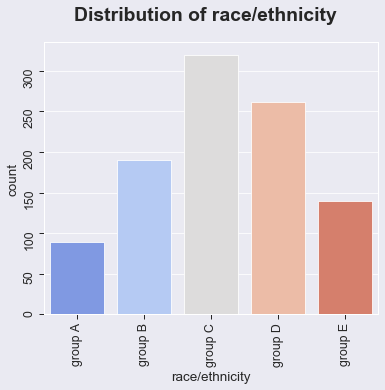

In [23]:
my_plot(report["race/ethnicity"],cmap = "coolwarm", ptype= "count", fsize=(6,5))

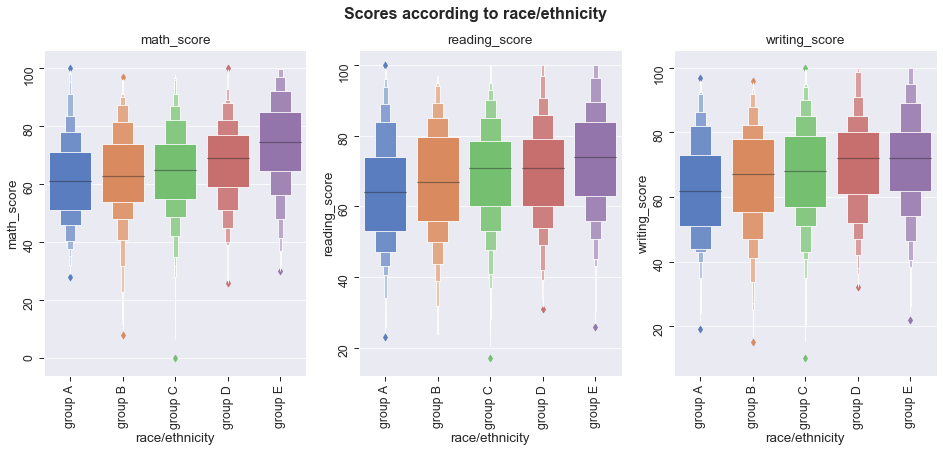

In [24]:
plot_score(report,"race/ethnicity", pal = "muted", ptype="boxen")

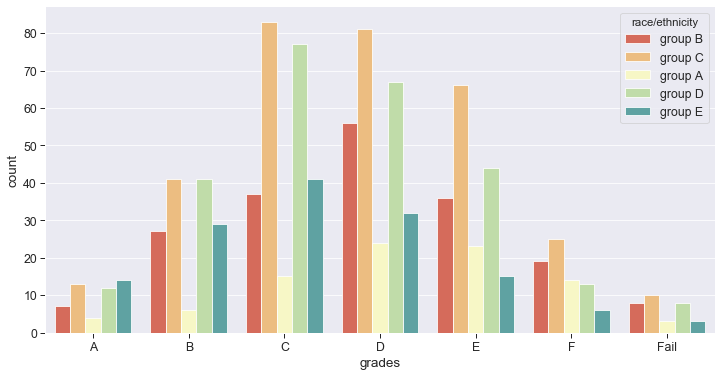

In [25]:
cplot(report,hue="race/ethnicity", pal="Spectral")

### 6. Distribution of Scores based on race/ethnicity:
- The distribution shows that highest no of students belong to `group C` followed by `group D` and `group B`.
- From the graphs plotted, we can observe that in all the 3 scores `group E` performed the best whereas `group A` scored the least.
- In math scores there is a trend of increase in scores from `group A` followed by `group B`, `group C`, `group D` and `group E`(highest scorer).
- While in reading and writing exam, `group B`, `group C` and `group D` had similar scores.

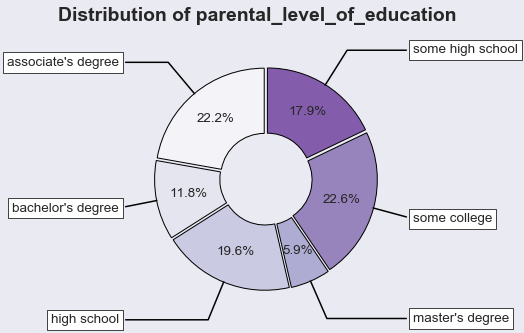

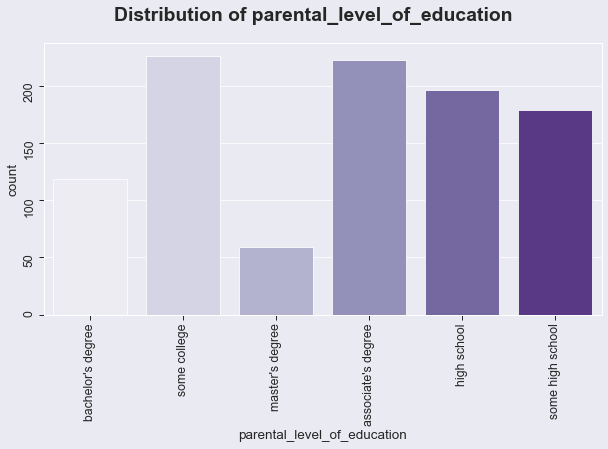

In [26]:
my_plot(report["parental_level_of_education"], 0.6, "Purples", ptype= "pie", order=None)
my_plot(report["parental_level_of_education"], 0.6, "Purples", ptype= "count", order=None)

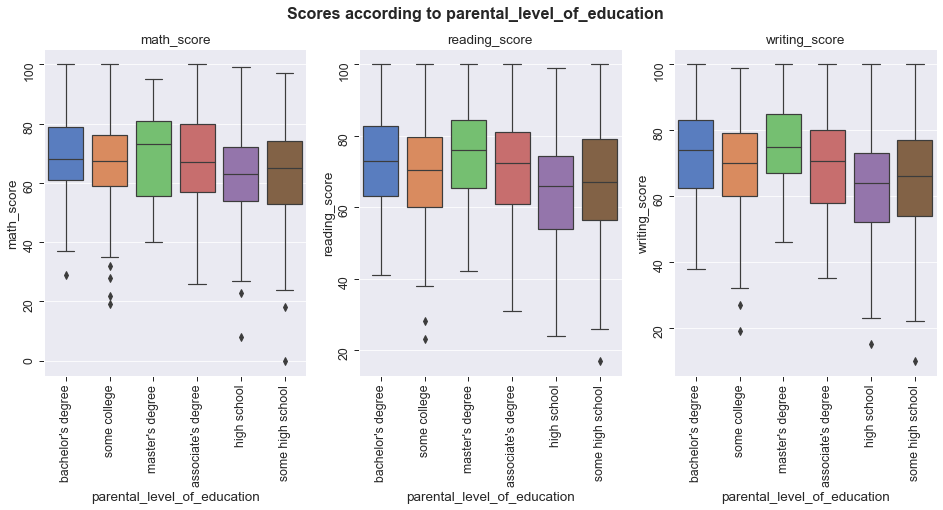

In [27]:
plot_score(report, "parental_level_of_education", sort_order=0, pal = "muted")

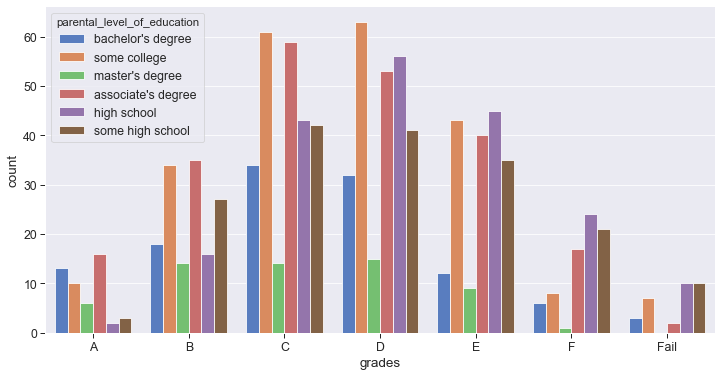

In [28]:
cplot(report, hue="parental_level_of_education", pal="muted")

### 7. Distribution of Scores based on Parental Level of Education:
- We can observe that highest no of students have parents with a `associate's degree` or have attended `some college`.
- The number of number of students with parents having a `master's degree` is the least.
- `Highest` marks are scored by students with parents having a `master's degree` followed by students with parents having a `bachelors's degree`.
- The students whose parents with `high school` education only scored the `least` marks.
- These trends can be observed in all the `three scores`.

***Note:*** *Assumption has been made that some high school / college means they did not finish it. So, some high school or college is different from high school or a degree respectively.*

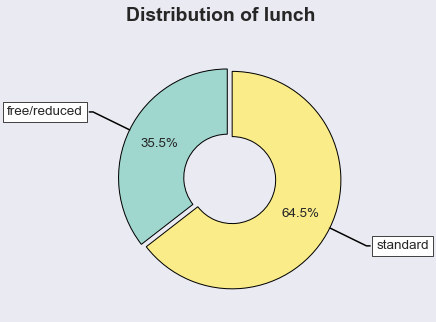

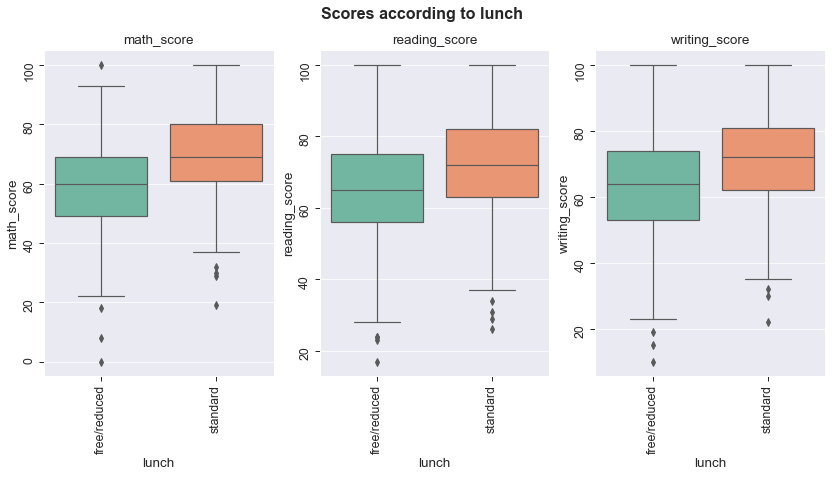

In [29]:
my_plot(report["lunch"],0.8,"Set3")
plot_score(report,"lunch",fsize=(14,6), pal = "Set2")

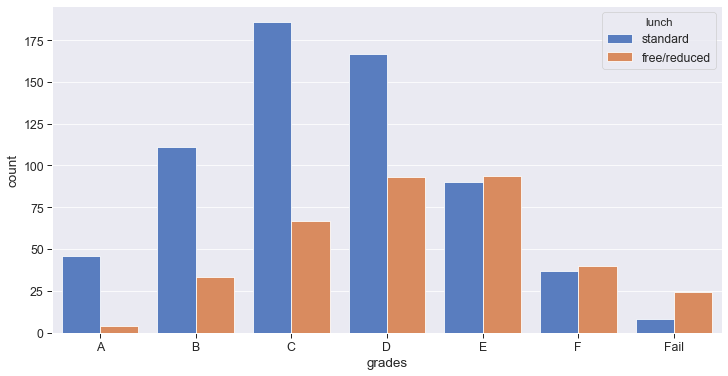

In [30]:
cplot(report, hue="lunch", pal="muted")

### 8. Distribution of Scores based on Lunch:
- We can see that almost `two-thirds` of students have `standard lunch`.
- The scores show that students with `standard lunch` have performed better. This is visible in all the `three scores`.
- The no. of students with `free/reduced lunch` are high among the `least` scorers.
- These observations can also be seen from the `grades` visualization.

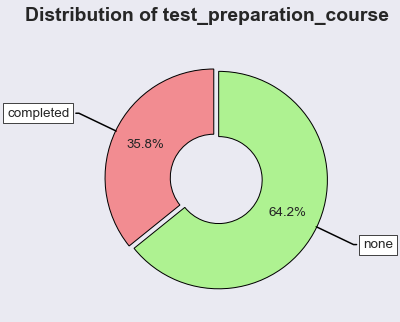

In [31]:
my_plot(report["test_preparation_course"],0.4,"prism")

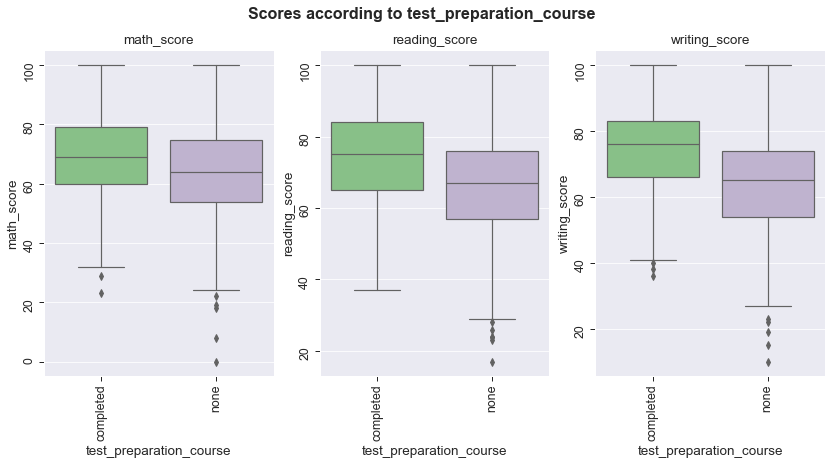

In [32]:
plot_score(report,"test_preparation_course", fsize=(14,6), pal = "Accent")

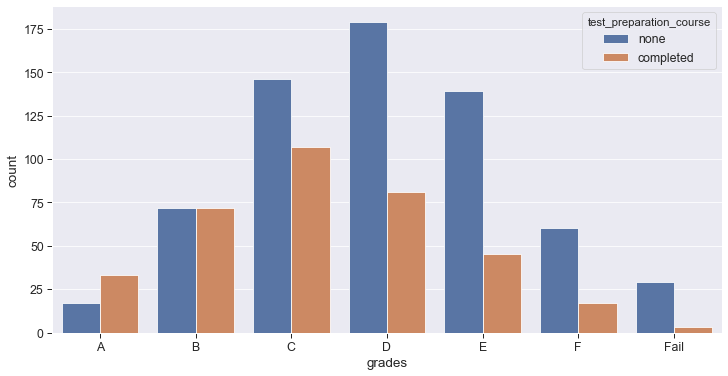

In [33]:
cplot(report,"test_preparation_course", pal = "deep")

### 9. Distribution of Scores based on Test Preparation Course:
- Here, we can see that `one thirds` of students `completed` the test preparation course.
- The effect of `test preparation` is evident in the scores of students. They have `performed better` in all the `three` exams than the students who `didn't complete` any test preparation.
- No. of students who had `none` of the test preparation courses were `significantly high` among the least scorers.
- Students who `completed` test preparation are more having a `A grade` whereas the students who did `none` are more having a `D, E, F grade and Fail`.